# 3. Processing Raw Text

Natural Language Processing with Python, by Steven Bird, Ewan Klein, and Edward Loper.

O'Reilly Media, 978-0-596-51649-9.

In [1]:
import nltk, re, pprint
from nltk import word_tokenize

### 3.1   Accessing Text from the Web and from Disk

**Electronic Books**

http://www.gutenberg.org/catalog/

In [2]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)

str

In [3]:
len(raw) # The variable raw contains a string with 1,176,893 characters.

1176967

In [4]:
raw[:75]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r'

In [5]:
tokens = word_tokenize(raw)
type(tokens)

list

In [6]:
len(tokens)

257727

In [7]:
tokens[:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [8]:
text = nltk.Text(tokens)
type(text)

nltk.text.Text

In [9]:
text[1024:1062]

['an',
 'exceptionally',
 'hot',
 'evening',
 'early',
 'in',
 'July',
 'a',
 'young',
 'man',
 'came',
 'out',
 'of',
 'the',
 'garret',
 'in',
 'which',
 'he',
 'lodged',
 'in',
 'S.',
 'Place',
 'and',
 'walked',
 'slowly',
 ',',
 'as',
 'though',
 'in',
 'hesitation',
 ',',
 'towards',
 'K.',
 'bridge',
 '.',
 'He',
 'had',
 'successfully']

In [ ]:
text.collocations()

In [10]:
raw.find("PART I")

5336

In [11]:
raw.rfind("End of Project Gutenberg's Crime")

-1

In [12]:
raw = raw[5338:1157743]

In [14]:
raw.find("PART I")

195769

**Dealing with HTML**

In [15]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [16]:
# http://www.crummy.com/software/BeautifulSoup/
from bs4 import BeautifulSoup
raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
tokens

['BBC',
 'NEWS',
 '|',
 'Health',
 '|',
 'Blondes',
 "'to",
 'die',
 'out',
 'in',
 '200',
 "years'",
 'NEWS',
 'SPORT',
 'WEATHER',
 'WORLD',
 'SERVICE',
 'A-Z',
 'INDEX',
 'SEARCH',
 'You',
 'are',
 'in',
 ':',
 'Health',
 'News',
 'Front',
 'Page',
 'Africa',
 'Americas',
 'Asia-Pacific',
 'Europe',
 'Middle',
 'East',
 'South',
 'Asia',
 'UK',
 'Business',
 'Entertainment',
 'Science/Nature',
 'Technology',
 'Health',
 'Medical',
 'notes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Talking',
 'Point',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Country',
 'Profiles',
 'In',
 'Depth',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Programmes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'SERVICES',
 'Daily',
 'E-mail',
 'News',
 'Ticker',
 'Mobile/PDAs',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Text',
 'Only',
 'Feedback',
 'Help',
 'EDITIONS',
 'Change',
 'to',
 'UK',
 'Friday',
 ',',
 '27',
 'September',
 ',',
 '2002',
 ',',
 '11:51',
 'GMT',
 '12:51'

In [17]:
tokens = tokens[110:390]
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


**Processing Search Engine Results**
**Processing RSS Feeds**

In [18]:
pip install feedparser

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\34677\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
# https://pypi.python.org/pypi/feedparser
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")
llog['feed']['title']

'Language Log'

In [20]:
len(llog.entries)

13

In [21]:
post = llog.entries[2]
post.title

'Before their time'

In [22]:
content = post.content[0].value
content[:70]

"<p>Sarah Cooper's marvelous enactments of Donald Trump's rhetoric have"

In [23]:
raw = BeautifulSoup(content, 'html.parser').get_text()
word_tokenize(raw)

['Sarah',
 'Cooper',
 "'s",
 'marvelous',
 'enactments',
 'of',
 'Donald',
 'Trump',
 "'s",
 'rhetoric',
 'have',
 'earned',
 'her',
 'an',
 'enormous',
 'audience',
 '—',
 '22.4M',
 'views',
 'for',
 'this',
 'one',
 'on',
 'twitter',
 ',',
 'for',
 'example',
 ',',
 'plus',
 'more',
 'views',
 'on',
 'tiktok',
 'and',
 'youtube',
 '.',
 'But',
 'there',
 "'s",
 'another',
 'comedian',
 'who',
 'pioneered',
 'the',
 'same',
 'technique',
 '—',
 'lip-syncing',
 'Trump',
 '—',
 'to',
 'a',
 'significantly',
 'smaller',
 'audience',
 'back',
 'in',
 '2015',
 'and',
 '2016',
 '.',
 'Or',
 'I',
 'should',
 'say',
 '``',
 'comedy',
 'team',
 "''",
 'rather',
 'than',
 '``',
 'comedian',
 "''",
 ',',
 'since',
 'these',
 'Trump-syncing',
 'videos',
 'come',
 'from',
 'a',
 'trio',
 'of',
 'comedians',
 'at',
 'Friend',
 'Dog',
 'Studios',
 ',',
 'Brian',
 'Huther',
 ',',
 'Ben',
 'Auxier',
 ',',
 'and',
 'Seth',
 'Macchi',
 '.',
 'I',
 'linked',
 'to',
 'an',
 'example',
 'in',
 '``',
 'Dona

**Leer archivos locales**

In [24]:
f = open ( 'document.txt' )
raw = f.read ()
print(raw)

Muerte en Persia
 by Annemarie Schwarzenbach

... Si bien en algunos momentos somos felices sin motivo,
no debemos bajo ningÃºn concepto ser infelices sin razÃ³n...





In [25]:
f = open('document.txt', 'rU')
for line in f:
    print(line.strip())

Muerte en Persia
by Annemarie Schwarzenbach

... Si bien en algunos momentos somos felices sin motivo,
no debemos bajo ningÃºn concepto ser infelices sin razÃ³n...




C:\Users\34677\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [26]:
path = nltk.data.find('corpora/gutenberg/melville-moby_dick.txt')
raw = open(path, 'rU').read()

C:\Users\34677\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


**Extracting Text from PDF, MSWord and other Binary Formats**
**Capturing User Input**

In [27]:
s = input("Enter some text: ")

Enter some text: sometimes we are happy without a reason.


In [28]:
print("You typed", len(word_tokenize(s)), "words.")

You typed 8 words.


**The NLP Pipeline**
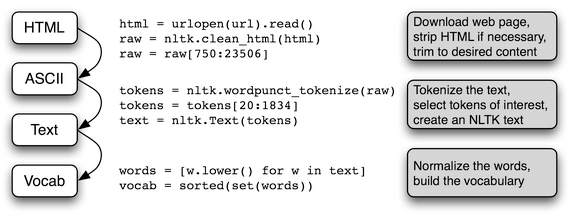

### 3.2 Cadenas: procesamiento de texto al nivel más bajo

**Basic Operations with Strings**

In [29]:
monty = 'Monty Python' 
monty

'Monty Python'

In [30]:
circus = "Monty Python's Flying Circus"
circus

"Monty Python's Flying Circus"

In [31]:
circus = 'Monty Python\'s Flying Circus'
circus

"Monty Python's Flying Circus"

In [32]:
couplet = "Shall I compare thee to a Summer's day?"\
"Thou are more lovely and more temperate:" 
print(couplet)

Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:


In [33]:
couplet = ("Rough winds do shake the darling buds of May,"
           "And Summer's lease hath all too short a date:")
print(couplet)

Rough winds do shake the darling buds of May,And Summer's lease hath all too short a date:


In [34]:
couplet = """Shall I compare thee to a Summer's day?
... Thou are more lovely and more temperate:"""
print(couplet)

Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:


In [35]:
couplet = '''Rough winds do shake the darling buds of May,
... And Summer's lease hath all too short a date:'''
print(couplet)

Rough winds do shake the darling buds of May,
And Summer's lease hath all too short a date:


In [36]:
'very' + 'very' + 'very'

'veryveryvery'

In [37]:
'very' * 3

'veryveryvery'

In [38]:
a = [1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]
b = [' ' * 2 * (7 - i) + 'very' * i for i in a]
for line in b:
     print(line)

            very
          veryvery
        veryveryvery
      veryveryveryvery
    veryveryveryveryvery
  veryveryveryveryveryvery
veryveryveryveryveryveryvery
  veryveryveryveryveryvery
    veryveryveryveryvery
      veryveryveryvery
        veryveryvery
          veryvery
            very


**Printing Strings**

In [39]:
grail = 'Holy Grail'
print(monty + grail)

Monty PythonHoly Grail


In [40]:
print(monty, grail)

Monty Python Holy Grail


In [41]:
print(monty, "and the", grail, 3)

Monty Python and the Holy Grail 3


**Accessing Individual Characters**

In [42]:
monty[0]

'M'

In [43]:
monty[-1]

'n'

In [44]:
monty[-7]

' '

In [46]:
sent = 'colorless green ideas sleep furiously'
for char in sent:
     print(char, end=' ')

c o l o r l e s s   g r e e n   i d e a s   s l e e p   f u r i o u s l y 

In [47]:
from nltk.corpus import gutenberg
raw = gutenberg.raw('melville-moby_dick.txt')
fdist = nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())
fdist.most_common(5)

[('e', 117092), ('t', 87996), ('a', 77916), ('o', 69326), ('n', 65617)]

In [48]:
[char for (char, count) in fdist.most_common()]

['e',
 't',
 'a',
 'o',
 'n',
 'i',
 's',
 'h',
 'r',
 'l',
 'd',
 'u',
 'm',
 'c',
 'w',
 'f',
 'g',
 'p',
 'b',
 'y',
 'v',
 'k',
 'q',
 'j',
 'x',
 'z']

**Accessing Substrings**
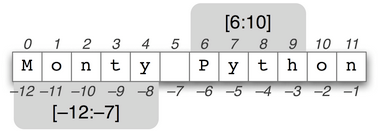

In [49]:
monty[6:10]

'Pyth'

In [50]:
monty[-12:-7]

'Monty'

In [51]:
monty[:5]

'Monty'

In [52]:
monty[6:]

'Python'

In [53]:
phrase = 'And now for something completely different'
if 'thing' in phrase:
     print('found "thing"')

found "thing"


In [54]:
monty.find('Python')

6

**More operations on strings**

Useful String Methods: all methods produce a new string or list

Method 	            Functionality
s.find(t) 	     index of first instance of string t inside s (-1 if not found)
s.rfind(t)       index of last instance of string t inside s (-1 if not found)
s.index(t) 	     like s.find(t) except it raises ValueError if not found
s.rindex(t) 	 like s.rfind(t) except it raises ValueError if not found
s.join(text) 	 combine the words of the text into a string using s as the glue
s.split(t) 	     split s into a list wherever a t is found (whitespace by default)
s.splitlines() 	 split s into a list of strings, one per line
s.lower()        a lowercased version of the string s
s.upper() 	     an uppercased version of the string s
s.title() 	     a titlecased version of the string s
s.strip() 	     a copy of s without leading or trailing whitespace
s.replace(t, u)  replace instances of t with u inside s

**The Difference between Lists and Strings**

In [55]:
query = 'Who knows?'
beatles = ['John', 'Paul', 'George', 'Ringo']
query[2]

'o'

In [56]:
beatles[2]

'George'

In [57]:
query[:2]

'Wh'

In [58]:
beatles[:2]

['John', 'Paul']

In [59]:
query + " I don't"

"Who knows? I don't"

In [60]:
beatles + 'Brian'

TypeError: can only concatenate list (not "str") to list

In [61]:
beatles + ['Brian']

['John', 'Paul', 'George', 'Ringo', 'Brian']

In [62]:
beatles[0] = "John Lennon"
del beatles[-1]
beatles

['John Lennon', 'Paul', 'George']

In [63]:
query[0] = 'F'

TypeError: 'str' object does not support item assignment

### 3.3   Text Processing with Unicode

**What is Unicode?**
**Extracting encoded text from files**

In [64]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

In [65]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line)

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


In [66]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line.encode('unicode_escape'))

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


In [67]:
ord('ń')

324

In [68]:
nacute = '\u0144'
nacute

'ń'

In [69]:
nacute.encode('utf8')

b'\xc5\x84'

In [70]:
import unicodedata
lines = open(path, encoding='latin2').readlines()
line = lines[2]
print(line.encode('unicode_escape'))

b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'


In [71]:
for c in line:
    if ord(c) > 127:
        print('{} U+{:04x} {}'.format(c.encode('utf8'), ord(c), unicodedata.name(c)))

b'\xc3\xb3' U+00f3 LATIN SMALL LETTER O WITH ACUTE
b'\xc5\x9b' U+015b LATIN SMALL LETTER S WITH ACUTE
b'\xc5\x9a' U+015a LATIN CAPITAL LETTER S WITH ACUTE
b'\xc4\x85' U+0105 LATIN SMALL LETTER A WITH OGONEK
b'\xc5\x82' U+0142 LATIN SMALL LETTER L WITH STROKE


### 3.4   Regular Expressions for Detecting Word Patterns

In [73]:
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

**Using Basic Meta-Characters**

In [74]:
[w for w in wordlist if re.search('ed$', w)]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded',
 'absorbed',
 'abstracted',
 'abstricted',
 'accelerated',
 'accepted',
 'accidented',
 'accoladed',
 'accolated',
 'accomplished',
 'accosted',
 'accredited',
 'accursed',
 'accused',
 'accustomed',
 'acetated',
 'acheweed',
 'aciculated',
 'aciliated',
 'acknowledged',
 'acorned',
 'acquainted',
 'acquired',
 'acquisited',
 'acred',
 'aculeated',
 'addebted',
 'added',
 'addicted',
 'addlebrained',
 'addleheaded',
 'addlepated',
 'addorsed',
 'adempted',
 'adfected',
 'adjoined',
 'admired',
 'admitted',
 'adnexed',
 'adopted',
 'adossed',
 'adreamed',
 'adscripted',
 'aduncated',
 'advanced',
 'advised',
 'aeried',
 'aethered',
 'afeared',
 'affected',
 'affectioned',
 'affined',
 'afflicted',
 'affricated',
 'affrighted',
 'affronted',
 'aforenamed',
 'afterfeed',
 'aftershafted',
 'afterthoughted',
 'afterwitted',
 'agazed',
 'aged',
 'agglomerated',
 'aggri

In [75]:
# The . wildcard symbol matches any single character.
[w for w in wordlist if re.search('^..j..t..$', w)]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector',
 'unjilted',
 'unjolted',
 'unjustly']

In [76]:
# The caret symbol ^ matches the start of a string, just like the $ matches the end.
[w for w in wordlist if re.search('..j..t..', w)]

['abjectedness',
 'abjection',
 'abjective',
 'abjectly',
 'abjectness',
 'adjection',
 'adjectional',
 'adjectival',
 'adjectivally',
 'adjective',
 'adjectively',
 'adjectivism',
 'adjectivitis',
 'adjustable',
 'adjustably',
 'adjustage',
 'adjustation',
 'adjuster',
 'adjustive',
 'adjustment',
 'antejentacular',
 'antiprojectivity',
 'bijouterie',
 'coadjustment',
 'cojusticiar',
 'conjective',
 'conjecturable',
 'conjecturably',
 'conjectural',
 'conjecturalist',
 'conjecturality',
 'conjecturally',
 'conjecture',
 'conjecturer',
 'coprojector',
 'counterobjection',
 'dejected',
 'dejectedly',
 'dejectedness',
 'dejectile',
 'dejection',
 'dejectly',
 'dejectory',
 'dejecture',
 'disjection',
 'guanajuatite',
 'inadjustability',
 'inadjustable',
 'injectable',
 'injection',
 'injector',
 'injustice',
 'insubjection',
 'interjection',
 'interjectional',
 'interjectionalize',
 'interjectionally',
 'interjectionary',
 'interjectionize',
 'interjectiveness',
 'interjector',
 'interje

The ? symbol specifies that the previous character is optional.

**Ranges and Closures**

In [77]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['gold', 'golf', 'hold', 'hole']

In [78]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [80]:
[w for w in chat_words if re.search('^m*i*n*e*$', w)]

['',
 'e',
 'i',
 'in',
 'm',
 'me',
 'meeeeeeeeeeeee',
 'mi',
 'miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'min',
 'mine',
 'mm',
 'mmm',
 'mmmm',
 'mmmmm',
 'mmmmmm',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee',
 'mmmmmmmmmm',
 'mmmmmmmmmmmmm',
 'mmmmmmmmmmmmmm',
 'n',
 'ne']

In [ ]:
# + simply means "one or more instances of the preceding item"
# * simply means "zero or more instances of the preceding item"

In [79]:
[w for w in chat_words if re.search('^[ha]+$', w)]

['a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'h',
 'ha',
 'haaa',
 'hah',
 'haha',
 'hahaaa',
 'hahah',
 'hahaha',
 'hahahaa',
 'hahahah',
 'hahahaha',
 'hahahahaaa',
 'hahahahahaha',
 'hahahahahahaha',
 'hahahahahahahahahahahahahahahaha',
 'hahahhahah',
 'hahhahahaha']

In [81]:
[w for w in chat_words if re.search('^[ha]*$', w)]

['',
 'a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'h',
 'ha',
 'haaa',
 'hah',
 'haha',
 'hahaaa',
 'hahah',
 'hahaha',
 'hahahaa',
 'hahahah',
 'hahahaha',
 'hahahahaaa',
 'hahahahahaha',
 'hahahahahahaha',
 'hahahahahahahahahahahahahahahaha',
 'hahahhahah',
 'hahhahahaha']

In [84]:
wsj = sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]

['0.0085',
 '0.05',
 '0.1',
 '0.16',
 '0.2',
 '0.25',
 '0.28',
 '0.3',
 '0.4',
 '0.5',
 '0.50',
 '0.54',
 '0.56',
 '0.60',
 '0.7',
 '0.82',
 '0.84',
 '0.9',
 '0.95',
 '0.99',
 '1.01',
 '1.1',
 '1.125',
 '1.14',
 '1.1650',
 '1.17',
 '1.18',
 '1.19',
 '1.2',
 '1.20',
 '1.24',
 '1.25',
 '1.26',
 '1.28',
 '1.35',
 '1.39',
 '1.4',
 '1.457',
 '1.46',
 '1.49',
 '1.5',
 '1.50',
 '1.55',
 '1.56',
 '1.5755',
 '1.5805',
 '1.6',
 '1.61',
 '1.637',
 '1.64',
 '1.65',
 '1.7',
 '1.75',
 '1.76',
 '1.8',
 '1.82',
 '1.8415',
 '1.85',
 '1.8500',
 '1.9',
 '1.916',
 '1.92',
 '10.19',
 '10.2',
 '10.5',
 '107.03',
 '107.9',
 '109.73',
 '11.10',
 '11.5',
 '11.57',
 '11.6',
 '11.72',
 '11.95',
 '112.9',
 '113.2',
 '116.3',
 '116.4',
 '116.7',
 '116.9',
 '118.6',
 '12.09',
 '12.5',
 '12.52',
 '12.68',
 '12.7',
 '12.82',
 '12.97',
 '120.7',
 '1206.26',
 '121.6',
 '126.1',
 '126.15',
 '127.03',
 '129.91',
 '13.1',
 '13.15',
 '13.5',
 '13.50',
 '13.625',
 '13.65',
 '13.73',
 '13.8',
 '13.90',
 '130.6',
 '130.7',
 '

In [85]:
[w for w in wsj if re.search('^[0-9]+.[0-9]+$', w)]

['0.0085',
 '0.05',
 '0.1',
 '0.16',
 '0.2',
 '0.25',
 '0.28',
 '0.3',
 '0.4',
 '0.5',
 '0.50',
 '0.54',
 '0.56',
 '0.60',
 '0.7',
 '0.82',
 '0.84',
 '0.9',
 '0.95',
 '0.99',
 '1,000',
 '1,100',
 '1,200',
 '1,298',
 '1,400',
 '1,460',
 '1,500',
 '1,570',
 '1,620',
 '1,880',
 '1.01',
 '1.1',
 '1.125',
 '1.14',
 '1.1650',
 '1.17',
 '1.18',
 '1.19',
 '1.2',
 '1.20',
 '1.24',
 '1.25',
 '1.26',
 '1.28',
 '1.35',
 '1.39',
 '1.4',
 '1.457',
 '1.46',
 '1.49',
 '1.5',
 '1.50',
 '1.55',
 '1.56',
 '1.5755',
 '1.5805',
 '1.6',
 '1.61',
 '1.637',
 '1.64',
 '1.65',
 '1.7',
 '1.75',
 '1.76',
 '1.8',
 '1.82',
 '1.8415',
 '1.85',
 '1.8500',
 '1.9',
 '1.916',
 '1.92',
 '10,000',
 '10.19',
 '10.2',
 '10.5',
 '100',
 '100,000',
 '100,980',
 '101',
 '102',
 '103',
 '105',
 '106',
 '107',
 '107.03',
 '107.9',
 '108',
 '109.73',
 '11,000',
 '11,762',
 '11.10',
 '11.5',
 '11.57',
 '11.6',
 '11.72',
 '11.95',
 '110',
 '111',
 '112.9',
 '113.2',
 '114',
 '115',
 '116.3',
 '116.4',
 '116.7',
 '116.9',
 '118',
 '

In [86]:
[w for w in wsj if re.search('^[A-Z]+\$$', w)]

['C$', 'US$']

In [87]:
[w for w in wsj if re.search('^[A-Z]+$$', w)]

['A',
 'ABA',
 'ABORTION',
 'ACCEPTANCES',
 'ACCOUNT',
 'ACQUISITION',
 'AG',
 'AGREES',
 'AIDS',
 'AMR',
 'AN',
 'AND',
 'APPEARS',
 'ASLACTON',
 'ASSETS',
 'ASSOCIATES',
 'ASSOCIATION',
 'B',
 'BALLOT',
 'BANKERS',
 'BILLS',
 'BIRDS',
 'BMP',
 'BRAMALEA',
 'BRIEFS',
 'BTR',
 'CALL',
 'CAMPAIGN',
 'CAT',
 'CBS',
 'CDC',
 'CEO',
 'CERTIFICATES',
 'CHANGED',
 'CIA',
 'CLEARS',
 'COLLECTING',
 'COMMERCIAL',
 'COMMUNICATIONS',
 'COMPUTERS',
 'COPPER',
 'CORP',
 'CS',
 'CSV',
 'CTB',
 'CTBS',
 'DD',
 'DDB',
 'DEFENSE',
 'DEPOSIT',
 'DES',
 'DIALING',
 'DIAPER',
 'DISCOUNT',
 'DNA',
 'DOONESBURY',
 'DOT',
 'DSM',
 'EC',
 'ECONOMIC',
 'EEOC',
 'ENDED',
 'ENERGY',
 'EST',
 'EURODOLLARS',
 'EVERYONE',
 'EXCHANGE',
 'F',
 'FALL',
 'FAMILY',
 'FAX',
 'FBI',
 'FEDERAL',
 'FERC',
 'FIRST',
 'FOREIGN',
 'FT',
 'FTC',
 'FUNDS',
 'G',
 'GAF',
 'GHKM',
 'GHS',
 'GM',
 'GMAC',
 'GOODY',
 'GOP',
 'GRAINS',
 'GROWTH',
 'HHS',
 'HOME',
 'HUD',
 'I',
 'IBC',
 'IBM',
 'II',
 'III',
 'IMSAI',
 'INQUIRY',
 'I

In [88]:
[w for w in wsj if re.search('^[A-Z]+$', w)]

['A',
 'ABA',
 'ABORTION',
 'ACCEPTANCES',
 'ACCOUNT',
 'ACQUISITION',
 'AG',
 'AGREES',
 'AIDS',
 'AMR',
 'AN',
 'AND',
 'APPEARS',
 'ASLACTON',
 'ASSETS',
 'ASSOCIATES',
 'ASSOCIATION',
 'B',
 'BALLOT',
 'BANKERS',
 'BILLS',
 'BIRDS',
 'BMP',
 'BRAMALEA',
 'BRIEFS',
 'BTR',
 'CALL',
 'CAMPAIGN',
 'CAT',
 'CBS',
 'CDC',
 'CEO',
 'CERTIFICATES',
 'CHANGED',
 'CIA',
 'CLEARS',
 'COLLECTING',
 'COMMERCIAL',
 'COMMUNICATIONS',
 'COMPUTERS',
 'COPPER',
 'CORP',
 'CS',
 'CSV',
 'CTB',
 'CTBS',
 'DD',
 'DDB',
 'DEFENSE',
 'DEPOSIT',
 'DES',
 'DIALING',
 'DIAPER',
 'DISCOUNT',
 'DNA',
 'DOONESBURY',
 'DOT',
 'DSM',
 'EC',
 'ECONOMIC',
 'EEOC',
 'ENDED',
 'ENERGY',
 'EST',
 'EURODOLLARS',
 'EVERYONE',
 'EXCHANGE',
 'F',
 'FALL',
 'FAMILY',
 'FAX',
 'FBI',
 'FEDERAL',
 'FERC',
 'FIRST',
 'FOREIGN',
 'FT',
 'FTC',
 'FUNDS',
 'G',
 'GAF',
 'GHKM',
 'GHS',
 'GM',
 'GMAC',
 'GOODY',
 'GOP',
 'GRAINS',
 'GROWTH',
 'HHS',
 'HOME',
 'HUD',
 'I',
 'IBC',
 'IBM',
 'II',
 'III',
 'IMSAI',
 'INQUIRY',
 'I

In [89]:
# The braced expressions {} specify the number of repeats of the previous item.
[w for w in wsj if re.search('^[0-9]{4}$', w)]

['1614',
 '1637',
 '1787',
 '1901',
 '1903',
 '1917',
 '1925',
 '1929',
 '1933',
 '1934',
 '1948',
 '1953',
 '1955',
 '1956',
 '1961',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1975',
 '1976',
 '1977',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2005',
 '2009',
 '2017',
 '2019',
 '2029',
 '3057',
 '8300']

In [90]:
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]

['10-day',
 '10-lap',
 '10-year',
 '100-share',
 '12-point',
 '12-year',
 '14-hour',
 '15-day',
 '150-point',
 '190-point',
 '20-point',
 '20-stock',
 '21-month',
 '237-seat',
 '240-page',
 '27-year',
 '30-day',
 '30-point',
 '30-share',
 '30-year',
 '300-day',
 '36-day',
 '36-store',
 '42-year',
 '50-state',
 '500-stock',
 '52-week',
 '69-point',
 '84-month',
 '87-store',
 '90-day']

In [91]:
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

['black-and-white',
 'bread-and-butter',
 'father-in-law',
 'machine-gun-toting',
 'savings-and-loan']

In [92]:
# The pipe character indicates a choice between the material on its left or its right. 
[w for w in wsj if re.search('(ed|ing)$', w)]

['62%-owned',
 'Absorbed',
 'According',
 'Adopting',
 'Advanced',
 'Advancing',
 'Alfred',
 'Allied',
 'Annualized',
 'Anything',
 'Arbitrage-related',
 'Arbitraging',
 'Asked',
 'Assuming',
 'Atlanta-based',
 'Baking',
 'Banking',
 'Beginning',
 'Beijing',
 'Being',
 'Bermuda-based',
 'Betting',
 'Boeing',
 'Broadcasting',
 'Bucking',
 'Buying',
 'Calif.-based',
 'Change-ringing',
 'Citing',
 'Concerned',
 'Confronted',
 'Conn.based',
 'Consolidated',
 'Continued',
 'Continuing',
 'Declining',
 'Defending',
 'Depending',
 'Designated',
 'Determining',
 'Developed',
 'Died',
 'During',
 'Encouraged',
 'Encouraging',
 'English-speaking',
 'Estimated',
 'Everything',
 'Excluding',
 'Exxon-owned',
 'Faulding',
 'Fed',
 'Feeding',
 'Filling',
 'Filmed',
 'Financing',
 'Following',
 'Founded',
 'Fracturing',
 'Francisco-based',
 'Fred',
 'Funded',
 'Funding',
 'Generalized',
 'Germany-based',
 'Getting',
 'Guaranteed',
 'Having',
 'Heating',
 'Heightened',
 'Holding',
 'Housing',
 'Illumin

In [93]:
[w for w in wsj if re.search('ed|ing$', w)]

['62%-owned',
 'Absorbed',
 'According',
 'Adopting',
 'Advanced',
 'Advancing',
 'Alfred',
 'Allied',
 'Annualized',
 'Anything',
 'Arbitrage-related',
 'Arbitraging',
 'Asked',
 'Assuming',
 'Atlanta-based',
 'Baking',
 'Banking',
 'Beginning',
 'Beijing',
 'Being',
 'Bermuda-based',
 'Betting',
 'Biedermann',
 'Boeing',
 'Breeden',
 'Broadcasting',
 'Bucking',
 'Buying',
 'Calif.-based',
 'Cathedral',
 'Cedric',
 'Change-ringing',
 'Citing',
 'Concerned',
 'Confederation',
 'Confronted',
 'Conn.based',
 'Consolidated',
 'Continued',
 'Continuing',
 'Credit',
 'Declining',
 'Defending',
 'Depending',
 'Designated',
 'Determining',
 'Developed',
 'Died',
 'During',
 'Encouraged',
 'Encouraging',
 'English-speaking',
 'Estimated',
 'Everything',
 'Excluding',
 'Exxon-owned',
 'Faulding',
 'Fed',
 'Federal',
 'Federalist',
 'Federation',
 'Feeding',
 'Filling',
 'Filmed',
 'Financing',
 'Following',
 'Founded',
 'Fracturing',
 'Francisco-based',
 'Fred',
 'Freddie',
 'Frederick',
 'Frie

#### Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

Operator             -  Behavior

. 	            Wildcard, matches any character
^abc 	        Matches some pattern abc at the start of a string
abc$ 	        Matches some pattern abc at the end of a string
[abc] 	        Matches one of a set of characters
[A-Z0-9] 	    Matches one of a range of characters
ed|ing|s 	    Matches one of the specified strings (disjunction)
* 	            Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+ 	            One or more of previous item, e.g. a+, [a-z]+
? 	            Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n} 	        Exactly n repeats where n is a non-negative integer
{n,} 	        At least n repeats
{,n} 	        No more than n repeats
{m,n} 	        At least m and no more than n repeats
a(b|c)+ 	    Parentheses that indicate the scope of the operators

To the Python interpreter, a regular expression is just like any other string. 

If the string contains a backslash followed by particular characters, it will interpret these specially.

### 3.5   Useful Applications of Regular Expressions

**Extracting Word Pieces**

In [95]:
word = 'supercalifragilisticexpialidocious'
print(re.findall(r'[aeiou]', word))

['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']


In [96]:
len(re.findall(r'[aeiou]', word))

16

In [97]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
                      for vs in re.findall(r'[aeiou]{2,}', word))
fd.most_common(12)

[('io', 549),
 ('ea', 476),
 ('ie', 331),
 ('ou', 329),
 ('ai', 261),
 ('ia', 253),
 ('ee', 217),
 ('oo', 174),
 ('ua', 109),
 ('au', 106),
 ('ue', 105),
 ('ui', 95)]

**Doing More with Word Pieces**

In [99]:
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
    pieces = re.findall(regexp, word)
    return ''.join(pieces)

english_udhr = nltk.corpus.udhr.words('English-Latin1')
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


In [100]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


In [101]:
cv_word_pairs = [(cv, w) for w in rotokas_words
                         for cv in re.findall(r'[ptksvr][aeiou]', w)]
cv_index = nltk.Index(cv_word_pairs)
cv_index['su']

['kasuari']

In [102]:
cv_index['po']

['kaapo',
 'kaapopato',
 'kaipori',
 'kaiporipie',
 'kaiporivira',
 'kapo',
 'kapoa',
 'kapokao',
 'kapokapo',
 'kapokapo',
 'kapokapoa',
 'kapokapoa',
 'kapokapora',
 'kapokapora',
 'kapokaporo',
 'kapokaporo',
 'kapokari',
 'kapokarito',
 'kapokoa',
 'kapoo',
 'kapooto',
 'kapoovira',
 'kapopaa',
 'kaporo',
 'kaporo',
 'kaporopa',
 'kaporoto',
 'kapoto',
 'karokaropo',
 'karopo',
 'kepo',
 'kepoi',
 'keposi',
 'kepoto']

**Finding Word Stems**

In [108]:
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

if __name__=="__main__":
    print(stem('fishing'))

fish


In [109]:
print(stem('fishing'))

fish


In [110]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

In [111]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

In [112]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('processe', 's')]

In [113]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('process', 'es')]

In [114]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

In [115]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'language')

[]

In [117]:
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords is no basis for a system of government.  Supreme executive power derives from a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
print([stem(t) for t in tokens])

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'ly', 'in', 'pond', 'distribut', 'sword', 'i', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'Supreme', 'execut', 'power', 'deriv', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


**Searching Tokenized Text**

In [118]:
from nltk.corpus import gutenberg, nps_chat
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>") 

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [119]:
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*> <.*> <bro>")

you rule bro; telling you bro; u twizted bro


In [120]:
chat.findall(r"<l.*>{3,}") 

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


In [124]:
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

and other noises; and other activities; and other liquids; and other
landmarks; and other monuments; and other jewels; and other items; and
other features; and other objects; and other microorganisms; and other
organizations; and other areas; and other factors; and other forms;
and other times; and other compilations; and other metals; and other
additives; and other profiles


### 3.6   Normalizing Text

In [125]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords is no basis for a system of government.  Supreme executive power derives from a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)

**Stemmers**

In [129]:
porter = nltk.PorterStemmer ()
lancaster = nltk.LancasterStemmer ()
print([porter.stem (t) for t in tokens],"\n")
print([lancaster.stem(t) for t in tokens])

['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'power', 'deriv', 'from', 'a', 'mandat', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcic', 'aquat', 'ceremoni', '.'] 

['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'bas', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'pow', 'der', 'from', 'a', 'mand', 'from', 'the', 'mass', ',', 'not', 'from', 'som', 'farc', 'aqu', 'ceremony', '.']


In [130]:
class IndexedText(object):

    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)
                                 for (i, word) in enumerate(text))

    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = int(width/4)                # words of context
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i-wc:i])
            rcontext = ' '.join(self._text[i:i+wc])
            ldisplay = '{:>{width}}'.format(lcontext[-width:], width=width)
            rdisplay = '{:{width}}'.format(rcontext[:width], width=width)
            print(ldisplay, rdisplay)

    def _stem(self, word):
        return self._stemmer.stem(word).lower()

In [131]:
porter = nltk.PorterStemmer()
grail = nltk.corpus.webtext.words('grail.txt')
text = IndexedText(porter, grail)
text.concordance('lie')

r king ! DENNIS : Listen , strange women lying in ponds distributing swords is no
 beat a very brave retreat . ROBIN : All lies ! MINSTREL : [ singing ] Bravest of
       Nay . Nay . Come . Come . You may lie here . Oh , but you are wounded !   
doctors immediately ! No , no , please ! Lie down . [ clap clap ] PIGLET : Well  
ere is much danger , for beyond the cave lies the Gorge of Eternal Peril , which 
   you . Oh ... TIM : To the north there lies a cave -- the cave of Caerbannog --
h it and lived ! Bones of full fifty men lie strewn about its lair . So , brave k
not stop our fight ' til each one of you lies dead , and the Holy Grail returns t


**Lemmatization**

In [133]:
wnl = nltk.WordNetLemmatizer()
print([wnl.lemmatize(t) for t in tokens])

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


### 3.7   Regular Expressions for Tokenizing Text

**Simple Approaches to Tokenization**

In [134]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone though), 'I won't have any pepper in my kitchen AT ALL. Soup does very well without--Maybe it's always pepper that makes people hot-tempered,'..."""

In [136]:
print(raw.split())

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


In [137]:
print(re.split(r' ', raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


In [138]:
print(re.split(r'[ \t\n]+', raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


In [139]:
print(re.split(r'\W+', raw))

['', 'When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered', '']


In [141]:
print(re.findall(r'\w+|\S\w*', raw))

["'When", 'I', "'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'I", 'won', "'t", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '-', '-Maybe', 'it', "'s", 'always', 'pepper', 'that', 'makes', 'people', 'hot', '-tempered', ',', "'", '.', '.', '.']


In [142]:
print(print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw)))

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']
None


Regular Expression Symbols

Symbol 	    Function
\b 	Word boundary (zero width)
\d 	Any decimal digit (equivalent to [0-9])
\D 	Any non-digit character (equivalent to [^0-9])
\s 	Any whitespace character (equivalent to [ \t\n\r\f\v])
\S 	Any non-whitespace character (equivalent to [^ \t\n\r\f\v])
\w 	Any alphanumeric character (equivalent to [a-zA-Z0-9_])
\W 	Any non-alphanumeric character (equivalent to [^a-zA-Z0-9_])
\t 	The tab character
\n 	The newline character

**NLTK's Regular Expression Tokenizer**

In [143]:
text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x)     # set flag to allow verbose regexps
...     (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
...   | \w+(?:-\w+)*       # words with optional internal hyphens
...   | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
...   | \.\.\.             # ellipsis
...   | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
... '''
nltk.regexp_tokenize(text, pattern)

['That U.', 'S.A.', 'poster-print co', 'sts $1', '2.40']

**Further Issues with Tokenization**

### 3.8   Segmentation

**Sentence Segmentation**

In [144]:
len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())

20.250994070456922

In [145]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


**Word Segmentation**

In [146]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"

def segment(text, segs):
    words = []
    last = 0
    for i in range(len(segs)):
        if segs[i] == '1':
            words.append(text[last:i+1])
            last = i+1
    words.append(text[last:])
    return words

In [147]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
segment(text, seg1)

['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']

In [149]:
print(segment(text, seg2))

['do', 'you', 'see', 'the', 'kitty', 'see', 'the', 'doggy', 'do', 'you', 'like', 'the', 'kitty', 'like', 'the', 'doggy']


In [150]:
def evaluate(text, segs):
    words = segment(text, segs)
    text_size = len(words)
    lexicon_size = sum(len(word) + 1 for word in set(words))
    return text_size + lexicon_size

In [152]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
seg3 = "0000100100000011001000000110000100010000001100010000001"
print(segment(text, seg3))

['doyou', 'see', 'thekitt', 'y', 'see', 'thedogg', 'y', 'doyou', 'like', 'thekitt', 'y', 'like', 'thedogg', 'y']


In [153]:
evaluate(text, seg3)

47

In [154]:
evaluate(text, seg2)

48

In [155]:
evaluate(text, seg1)

64

In [156]:
from random import randint

def flip(segs, pos):
    return segs[:pos] + str(1-int(segs[pos])) + segs[pos+1:]

def flip_n(segs, n):
    for i in range(n):
        segs = flip(segs, randint(0, len(segs)-1))
    return segs

def anneal(text, segs, iterations, cooling_rate):
    temperature = float(len(segs))
    while temperature > 0.5:
        best_segs, best = segs, evaluate(text, segs)
        for i in range(iterations):
            guess = flip_n(segs, round(temperature))
            score = evaluate(text, guess)
            if score < best:
                best, best_segs = score, guess
        score, segs = best, best_segs
        temperature = temperature / cooling_rate
        print(evaluate(text, segs), segment(text, segs))
    print()
    return segs

In [157]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
anneal(text, seg1, 5000, 1.2)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
62 ['doy', 'ou', 'seethekittyseet', 'hedoggy', 'doy', 'oul', 'ikethekitty', 'liket', 'hedoggy']
62 ['doy', 'ou', 'seethekittyseet', 'hedoggy', 'doy', 'oul', 'ikethekitty', 'liket', 'hedoggy']
62 ['doy', 'ou', 'seethekittyseet', 'hedoggy', 'doy', 'oul', 'ikethekitty', 'liket', 'hedoggy']
62 ['doy', 'ou', 'seethekittyseet', 'hedoggy', 'doy', 'oul', 'ikethekitty', 'liket', 'hedoggy']
60 ['doyou', 'seethe', 'kittyseet', 'hedoggy', 'doyou', 'l', 'ikethekitty', 'l', 'ik

'0000100010000001000100000010000100001000000100001000000'

### 3.9   Formatting: From Lists to Strings

**From Lists to Strings**

In [158]:
silly = ['We', 'called', 'him', 'Tortoise', 'because', 'he', 'taught', 'us', '.']
' '.join(silly)

'We called him Tortoise because he taught us .'

In [159]:
';'.join(silly)

'We;called;him;Tortoise;because;he;taught;us;.'

In [160]:
''.join(silly)

'WecalledhimTortoisebecausehetaughtus.'

**Strings and Formats**

In [161]:
fdist = nltk.FreqDist(['dog', 'cat', 'dog', 'cat', 'dog', 'snake', 'dog', 'cat'])
for word in sorted(fdist):
    print(word, '->', fdist[word], end='; ')

cat -> 3; dog -> 4; snake -> 1; 

In [162]:
for word in sorted(fdist):
    print('{}->{};'.format(word, fdist[word]), end=' ')

cat->3; dog->4; snake->1; 

In [163]:
'{}->{};'.format ('cat', 3)

'cat->3;'

In [164]:
'from {1} to {0}'.format('A', 'B')

'from B to A'

**Lining Things Up**

In [166]:
'{:6}'.format(41)

'    41'

In [167]:
'{:<6}' .format(41)

'41    '

In [168]:
'{:6}'.format('dog')

'dog   '

In [169]:
'{:>6}'.format('dog')

'   dog'

In [170]:
import math
'{:.4f}'.format(math.pi)

'3.1416'

In [171]:
count, total = 3205, 9375
"accuracy for {} words: {:.4%}".format(total, count / total)

'accuracy for 9375 words: 34.1867%'

In [172]:
def tabulate(cfdist, words, categories):
    print('{:16}'.format('Category'), end=' ')                    # column headings
    for word in words:
        print('{:>6}'.format(word), end=' ')
    print()
    for category in categories:
        print('{:16}'.format(category), end=' ')                  # row heading
        for word in words:                                        # for each word
            print('{:6}'.format(cfdist[category][word]), end=' ') # print table cell
        print()                                                   # end the row

from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
tabulate(cfd, modals, genres)

Category            can  could    may  might   must   will 
news                 93     86     66     38     50    389 
religion             82     59     78     12     54     71 
hobbies             268     58    131     22     83    264 
science_fiction      16     49      4     12      8     16 
romance              74    193     11     51     45     43 
humor                16     30      8      8      9     13 


In [177]:
'{:{width}}'.format('Monty Python', width = 15)

'Monty Python   '

**Writing Results to a File**

In [179]:
output_file = open('output.txt', 'w')
words = set(nltk.corpus.genesis.words('english-kjv.txt'))
for word in sorted(words):
    print(word, file=output_file)

In [181]:
len(words)

2789

In [182]:
str(len(words))

'2789'

**Text Wrapping**

In [180]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',',
          'more', 'is', 'said', 'than', 'done', '.']
for word in saying:
    print(word, '(' + str(len(word)) + '),', end=' ')

After (5), all (3), is (2), said (4), and (3), done (4), , (1), more (4), is (2), said (4), than (4), done (4), . (1), 

In [ ]:
str(len(words))

In [183]:
from textwrap import fill
pieces = ["{} {}".format(word, len(word)) for word in saying]
output = ' '.join(pieces)
wrapped = fill(output)
print(wrapped)

After 5 all 3 is 2 said 4 and 3 done 4 , 1 more 4 is 2 said 4 than 4
done 4 . 1


### 3.10   Summary


* In this book we view a text as a list of words. A "raw text" is a potentially long string containing words and whitespace formatting, and is how we typically store and visualize a text.

* A string is specified in Python using single or double quotes: 'Monty Python', "Monty Python".

* The characters of a string are accessed using indexes, counting from zero: 'Monty Python'[0] gives the value M. The length of a string is found using len().

* Substrings are accessed using slice notation: 'Monty Python'[1:5] gives the value onty. If the start index is omitted, the substring begins at the start of the string; if the end index is omitted, the slice continues to the end of the string.

* Strings can be split into lists: 'Monty Python'.split() gives ['Monty', 'Python']. Lists can be joined into strings: '/'.join(['Monty', 'Python']) gives 'Monty/Python'.

* We can read text from a file input.txt using text = open('input.txt').read(). We can read text from url using text = request.urlopen(url).read().decode('utf8'). We can iterate over the lines of a text file using for line in open(f).

* We can write text to a file by opening the file for writing output_file = open('output.txt', 'w'), then adding content to the file print("Monty Python", file=output_file).

* Texts found on the web may contain unwanted material (such as headers, footers, markup), that need to be removed before we do any linguistic processing.

* Tokenization is the segmentation of a text into basic units — or tokens — such as words and punctuation. Tokenization based on whitespace is inadequate for many applications because it bundles punctuation together with words. NLTK provides an off-the-shelf tokenizer nltk.word_tokenize().

* Lemmatization is a process that maps the various forms of a word (such as appeared, appears) to the canonical or citation form of the word, also known as the lexeme or lemma (e.g. appear).

* Regular expressions are a powerful and flexible method of specifying patterns. Once we have imported the re module, we can use re.findall() to find all substrings in a string that match a pattern.

* If a regular expression string includes a backslash, you should tell Python not to preprocess the string, by using a raw string with an r prefix: r'regexp'.

* When backslash is used before certain characters, e.g. \n, this takes on a special meaning (newline character); however, when backslash is used before regular expression wildcards and operators, e.g. \., \|, \$, these characters lose their special meaning and are matched literally.

* A string formatting expression template % arg_tuple consists of a format string template that contains conversion specifiers like %-6s and %0.2d.
